In [27]:
import numpy as np
import os
from glob import glob
from tqdm import tqdm
import librosa
import librosa.display
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [28]:
file_name_list = ['/*_0' + str(i) + '.npy' for i in range(1, 9 + 1)] + ['/*_' + str(i) + '.npy' for i in range(10, 10 + 1)]

In [29]:
# 문장별로 가장 짧은 문장 길이 리스트를 만듭니다 (40개의 문장)
def find_shortest(file_name_list):
    _file_length_list = []
    for i in file_name_list:
        _ = []
        for j in glob('./data/*/' + i):
            _.append(np.squeeze(np.load(j, allow_pickle=True)))
        _file_length_list.append(min([len(k) for k in _]))
    return _file_length_list


file_length_list_S = find_shortest(file_name_list)

In [30]:
# 문장별 가장 짧은 문장 길이로 자름.

AD, NM, PD = [], [], []
for i in ['AD', 'NM', 'PD']:
    _ = []
    for j in file_name_list:
        __ = []
        for k in glob('./data/' + i + j):
            _sample = np.squeeze(np.load(
                k, allow_pickle=True))[0:int(file_length_list_S[file_name_list.
                                                              index(j)])]
            _sample = librosa.feature.melspectrogram(_sample,
                                                     sr=16000,
                                                     win_length=200,
                                                     hop_length=160,
                                                     n_mels=64)
            __.append(librosa.power_to_db(_sample, ref=np.max))
        _.append(__)
    if i == 'AD': AD.append(_)
    elif i == 'NM': NM.append(_)
    else: PD.append(_)
del i, j, k

206
64


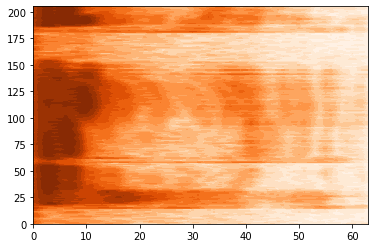

In [41]:
sample = AD[0][4][4]
xNum = np.shape(sample)[1]
yNum = np.shape(sample)[0]
print(xNum)
print(yNum)
z = np.array([[sample[y][x] for y in range(yNum)] for x in range(xNum)])
x, y = np.meshgrid(range(z.shape[1]), range(z.shape[0]))

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
cs = plt.contourf(x,y,z, levels = 15, cmap="Oranges")
input_dpi = 60 # 사진 해상도를 정하기 위한 dpi
plt.axis('on')
plt.show()

In [55]:
# AD melspectogram 데이터를 contour map 으로 변환하는 함수
def makeADSoundImg(pNum, sNum):
    sample = AD[0][sNum][pNum]
    xNum = np.shape(sample)[1]
    yNum = np.shape(sample)[0]
    z = np.array([[sample[y][x] for y in range(yNum)] for x in range(xNum)])
    x, y = np.meshgrid(range(z.shape[1]), range(z.shape[0]))

    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    cs = plt.contourf(x,y,z, levels = 15, cmap="hsv")
    input_dpi = 60 # 사진 해상도를 정하기 위한 dpi
    plt.axis('off')
    plt.savefig('./soundImgData/' + 'AD_'+str(pNum+1).zfill(2)+'_'+str(sNum+1).zfill(2), dpi = input_dpi)
    plt.cla()

In [56]:
# NM melspectogram 데이터를 contour map 으로 변환하는 함수
def makeNMSoundImg(pNum, sNum):
    sample = NM[0][sNum][pNum]
    xNum = np.shape(sample)[1]
    yNum = np.shape(sample)[0]
    z = np.array([[sample[y][x] for y in range(yNum)] for x in range(xNum)])
    x, y = np.meshgrid(range(z.shape[1]), range(z.shape[0]))

    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    cs = plt.contourf(x,y,z, levels = 15 , cmap="hsv")
    input_dpi = 60 # 사진 해상도를 정하기 위한 dpi
    plt.axis('off')
    plt.savefig('./soundImgData/' + 'NM_'+str(pNum+1).zfill(2)+'_'+str(sNum+1).zfill(2), dpi = input_dpi)
#     np.full((np.shape(sample)[0], np.shape(sample)[1]), 0)
    plt.cla()


In [57]:
# PD melspectogram 데이터를 contour map 으로 변환하는 함수
def makePDSoundImg(pNum, sNum):
    sample = PD[0][sNum][pNum]
    xNum = np.shape(sample)[1]
    yNum = np.shape(sample)[0]
    z = np.array([[sample[y][x] for y in range(yNum)] for x in range(xNum)])
    x, y = np.meshgrid(range(z.shape[1]), range(z.shape[0]))

    px = 1/plt.rcParams['figure.dpi']  # pixel in inches
    cs = plt.contourf(x,y,z, levels = 15 , cmap="hsv")
    input_dpi = 60 # 사진 해상도를 정하기 위한 dpi
    plt.axis('off')
    plt.savefig('./soundImgData/' + 'PD_'+str(pNum+1).zfill(2)+'_'+str(sNum+1).zfill(2), dpi = input_dpi)
#     np.full((np.shape(sample)[0], np.shape(sample)[1]), 0)
    plt.cla()


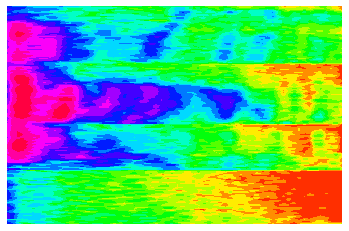

In [44]:
makePDSoundImg(10,9)

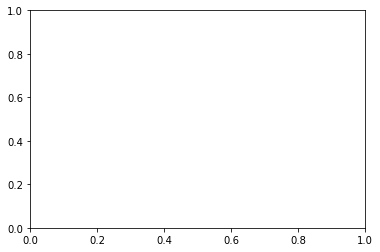

In [58]:
for i in range(0, 40):
    for j in range(0, 10):
        if j<40:
            makeADSoundImg(j, i)
            makePDSoundImg(j, i)
        makeNMSoundImg(j, i)
            

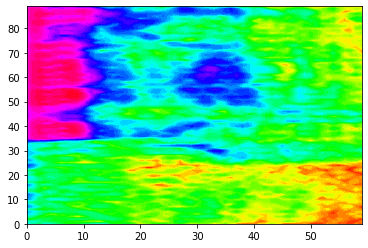

In [24]:
sample = NM[0][1][1]
xNum = 90
yNum = 60
z = np.array([[sample[y][x] for y in range(yNum)] for x in range(xNum)])
x, y = np.meshgrid(range(z.shape[1]), range(z.shape[0]))

px = 1/plt.rcParams['figure.dpi']  # pixel in inches

plt.contourf(x,y,z, levels = 50, cmap="hsv")
plt.show()

In [59]:
import numpy as np 
from PIL import Image 
import os 

path_dir = './soundImgData/'# '' 안에 파일을 묶고 있는 "폴더 경로"를 쓰세요 
file_list = os.listdir(path_dir)

for png in file_list: 
    image = Image.open(path_dir + png) 
    pixel = np.array(image)
    swapAxisNp = np.transpose(pixel, (2, 0, 1))
    png = png.split('.')[0] 
    
    snum = int(png[6:8])
    
    if(snum >= 1 and snum <=6) or (snum>=31 and snum<=32): # 1~6, 31~32 는 test data 로
        np.save("./soundNyData/data/test/"+png, swapAxisNp) 
    else:
        np.save("./soundNyData/data/train/"+png, swapAxisNp)
    
    